<a href="https://colab.research.google.com/github/bobchomba7/Decision-trees/blob/main/Animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

In [27]:
data=pd.read_csv("/content/drive/MyDrive/AnimalKingdom (1).csv", header="infer")
data

,Name,Cold-blooded,Warm-blooded,Waterborne,Airborne,Fins,Has Legs,Hair,Class
0,Tiger,0,1,0,0,0,4,1,mammals
1,Koala,0,1,0,0,0,4,1,mammals
2,Penguin,1,0,1,0,0,0,1,birds
3,Giraffe,0,1,0,0,0,4,1,mammals
4,Hippo,0,1,1,0,0,4,0,mammals
5,Chameleon,1,0,0,0,0,0,0,reptiles
6,Octopus,1,0,0,0,0,8,0,fishes
7,Wolf,0,1,0,0,0,4,1,mammals
8,Falcon,0,1,0,1,0,2,0,birds
9,Parrot,0,1,0,1,0,2,0,birds


In [28]:
print(data.columns)

Index(['Name', 'Cold-blooded', 'Warm-blooded', 'Waterborne', 'Airborne',
       'Fins', 'Has Legs', 'Hair', 'Class'],
      dtype='object')


In [29]:
data['Class']=data['Class'].replace(['reptiles','fishes','birds'],'non-mammals')

data

,Name,Cold-blooded,Warm-blooded,Waterborne,Airborne,Fins,Has Legs,Hair,Class
0,Tiger,0,1,0,0,0,4,1,mammals
1,Koala,0,1,0,0,0,4,1,mammals
2,Penguin,1,0,1,0,0,0,1,non-mammals
3,Giraffe,0,1,0,0,0,4,1,mammals
4,Hippo,0,1,1,0,0,4,0,mammals
5,Chameleon,1,0,0,0,0,0,0,non-mammals
6,Octopus,1,0,0,0,0,8,0,non-mammals
7,Wolf,0,1,0,0,0,4,1,mammals
8,Falcon,0,1,0,1,0,2,0,non-mammals
9,Parrot,0,1,0,1,0,2,0,non-mammals


In [30]:
pd.crosstab([data['Cold-blooded'],data['Waterborne']],data['Class'])

Class                    mammals  non-mammals
Cold-blooded Waterborne                      
0            0                 9            2
             1                 2            0
1            0                 0            2
             1                 0            4

In [31]:
from sklearn import tree

In [32]:
y=data['Class']
y

0         mammals
1         mammals
2     non-mammals
3         mammals
4         mammals
5     non-mammals
6     non-mammals
7         mammals
8     non-mammals
9     non-mammals
10    non-mammals
11        mammals
12        mammals
13        mammals
14        mammals
15        mammals
16    non-mammals
17    non-mammals
18        mammals
Name: Class, dtype: object

In [33]:
X=data.drop(['Name','Class'], axis=1)
X

,Cold-blooded,Warm-blooded,Waterborne,Airborne,Fins,Has Legs,Hair
0,0,1,0,0,0,4,1
1,0,1,0,0,0,4,1
2,1,0,1,0,0,0,1
3,0,1,0,0,0,4,1
4,0,1,1,0,0,4,0
5,1,0,0,0,0,0,0
6,1,0,0,0,0,8,0
7,0,1,0,0,0,4,1
8,0,1,0,1,0,2,0
9,0,1,0,1,0,2,0


In [34]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
clf=clf.fit(X,y)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
import pydotplus #provides data format for converting into images
from IPython.display import Image

In [37]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'],
                              filled=True,out_file=None)

dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Warm-blooded <= 0.5\\nentropy = 0.982\\nsamples = 19\\nvalue = [11, 8]\\nclass = mammals", fillcolor="#f8ddc9"] ;\n1 [label="entropy = 0.0\\nsamples = 6\\nvalue = [0, 6]\\nclass = non-mammals", fillcolor="#399de5"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Airborne <= 0.5\\nentropy = 0.619\\nsamples = 13\\nvalue = [11, 2]\\nclass = mammals", fillcolor="#ea985d"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.0\\nsamples = 11\\nvalue = [11, 0]\\nclass = mammals", fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 2\\nvalue = [0, 2]\\nclass = non-mammals", fillcolor="#399de5"] ;\n2 -> 4 ;\n}'

In [38]:
graph=pydotplus.graph_from_dot_data(dot_data)
graph

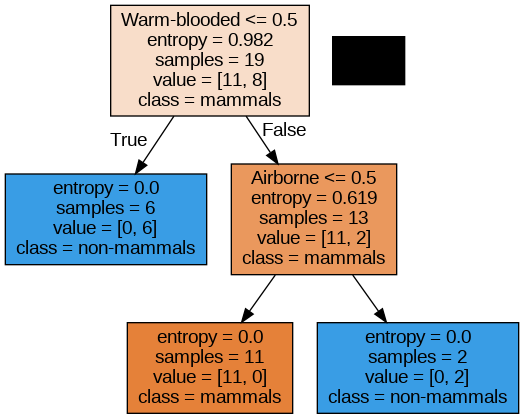

In [39]:
image=Image(graph.create_png())
image

In [40]:
testData=[['tortoise',1,0,1,0,0,1,0,'non-mammals'],
         ['hyena',0,1,0,0,0,1,1,'mammals'],
         ['pig',0,1,0,0,0,1,1,'mammals'],
         ['Frog',1,0,1,0,0,1,0,'non-mammals']]

testData

[['tortoise', 1, 0, 1, 0, 0, 1, 0, 'non-mammals'],
 ['hyena', 0, 1, 0, 0, 0, 1, 1, 'mammals'],
 ['pig', 0, 1, 0, 0, 0, 1, 1, 'mammals'],
 ['Frog', 1, 0, 1, 0, 0, 1, 0, 'non-mammals']]

In [41]:
data.columns

Index(['Name', 'Cold-blooded', 'Warm-blooded', 'Waterborne', 'Airborne',
       'Fins', 'Has Legs', 'Hair', 'Class'],
      dtype='object')

In [42]:
testData=pd.DataFrame(testData,columns=data.columns)
testData

,Name,Cold-blooded,Warm-blooded,Waterborne,Airborne,Fins,Has Legs,Hair,Class
0,tortoise,1,0,1,0,0,1,0,non-mammals
1,hyena,0,1,0,0,0,1,1,mammals
2,pig,0,1,0,0,0,1,1,mammals
3,Frog,1,0,1,0,0,1,0,non-mammals


In [43]:
testy=testData['Class']
testy

0    non-mammals
1        mammals
2        mammals
3    non-mammals
Name: Class, dtype: object

In [44]:
testX=testData.drop(['Name','Class'],axis=1)
testX

,Cold-blooded,Warm-blooded,Waterborne,Airborne,Fins,Has Legs,Hair
0,1,0,1,0,0,1,0
1,0,1,0,0,0,1,1
2,0,1,0,0,0,1,1
3,1,0,1,0,0,1,0


In [45]:
predy=clf.predict(testX)
predy

array(['non-mammals', 'mammals', 'mammals', 'non-mammals'], dtype=object)

In [46]:
testy

0    non-mammals
1        mammals
2        mammals
3    non-mammals
Name: Class, dtype: object

In [47]:
predictions=pd.concat([testData['Name'], testData['Class'], pd.Series(predy, name='Predicted Class')], axis=1)
predictions

,Name,Class,Predicted Class
0,tortoise,non-mammals,non-mammals
1,hyena,mammals,mammals
2,pig,mammals,mammals
3,Frog,non-mammals,non-mammals


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(testy, predy)

1.0

In [50]:
print('Accuracy on test data is %.2f' % (accuracy_score(testy, predy)))

Accuracy on test data is 1.00
Accuracy on test data is 1.00
